In [5]:
'''
Below code predicts the cost of Maintenance based on Data supplied.The only data needed in this case
is the technical team updates maintenance cost for several models and make of cars.We use ANN model 
considering the scale of maintenance needed for several make and model of cars which can be a 
huge dataset and is quite complex.Dataset used in this case is a simple dataset with few rows only.

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
os.chdir("C:\\Users\\sowmy\\Downloads")

In [7]:
Maintenance=pd.read_csv("Vehicle Maintenance- Service Records.csv")

In [8]:
Maintenance.head()

,slno,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
0,1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,...,0,0,0,0,0,0,0,0,0,2566
1,2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,...,0,0,0,0,0,0,0,0,0,2633
2,3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,...,0,0,0,0,0,0,0,0,0,2643
3,4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,...,0,0,0,0,0,0,0,0,0,2532
4,5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,...,0,0,0,0,0,0,0,0,0,2489


In [9]:
Maintenance.columns

Index(['slno', 'vehicle_type', 'brand', 'model', 'engine_type', 'make_year',
       'region', 'mileage_range', 'mileage', 'oil_filter', 'engine_oil',
       'washer_plug_drain', 'dust_and_pollen_filter',
       'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
       'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
       'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost'],
      dtype='object')

In [10]:
Maintenance['vehicle_type'].unique()

array(['car'], dtype=object)

In [11]:
Maintenance['brand'].unique()

array(['honda', 'toyota'], dtype=object)

In [12]:
Maintenance['model'].unique()

array(['jazz', 'amaze', 'city', 'fortuner'], dtype=object)

In [13]:
Maintenance=Maintenance.drop(['slno'],axis=1)

In [14]:
x=Maintenance.iloc[:,0:-1]

In [15]:
x

,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,engine_oil,...,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant
0,car,honda,jazz,petrol,2017,chennai,10000,11400,1,1,...,1,0,0,0,0,0,0,0,0,0
1,car,honda,jazz,petrol,2017,chennai,10000,11453,1,1,...,1,0,0,0,0,0,0,0,0,0
2,car,honda,jazz,petrol,2017,chennai,10000,10706,1,1,...,0,0,0,0,0,0,0,0,0,0
3,car,honda,jazz,petrol,2017,chennai,10000,11015,1,1,...,0,0,0,0,0,0,0,0,0,0
4,car,honda,jazz,petrol,2017,chennai,10000,10039,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,car,toyota,fortuner,diesel,2016,mumbai,100000,96236,1,1,...,0,0,1,0,0,0,0,0,0,0
1135,car,toyota,fortuner,diesel,2016,mumbai,100000,93438,1,1,...,0,0,1,0,0,0,0,0,0,0
1136,car,toyota,fortuner,diesel,2016,mumbai,100000,106788,1,1,...,1,1,1,0,1,0,0,0,0,0
1137,car,toyota,fortuner,diesel,2016,mumbai,100000,112576,1,1,...,1,1,1,0,1,0,0,0,0,0


In [166]:
x_onehot=pd.get_dummies(data=x,dtype=int)

In [167]:
x_onehot=x_onehot.drop(['mileage_range'],axis=1)

In [168]:
y=Maintenance.iloc[:,-1]

In [169]:
y=y.values

In [170]:
x_onehot

,make_year,mileage,oil_filter,engine_oil,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,...,brand_honda,brand_toyota,model_amaze,model_city,model_fortuner,model_jazz,engine_type_diesel,engine_type_petrol,region_chennai,region_mumbai
0,2017,11400,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,2017,11453,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,2017,10706,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,2017,11015,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,2017,10039,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2016,96236,1,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1135,2016,93438,1,1,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1136,2016,106788,1,1,1,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
1137,2016,112576,1,1,1,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1


In [62]:
from sklearn.preprocessing import minmax_scale

In [63]:
x_min=minmax_scale(x_onehot)

In [64]:
x_min

array([[0.5       , 0.01847035, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.5       , 0.01888184, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.5       , 0.0130822 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.75905467, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.80399221, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.78986964, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x_min,y)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
LR=LinearRegression()

In [69]:
LR.fit(X_Train,Y_Train)

LinearRegression()

In [70]:
y_pred=LR.predict(X_Test)

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_pred,Y_Test)

0.6992147485219202

In [73]:
import tensorflow as tf

In [74]:
ann=tf.keras.models.Sequential()

In [75]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [76]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [77]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [78]:
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [79]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [152]:
ann.fit(X_Train,Y_Train,batch_size=32,epochs=3000)

Epoch 1/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197842.4844 - mean_squared_error: 197842.4844
Epoch 2/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 242128.7812 - mean_squared_error: 242128.7812
Epoch 3/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 229852.7188 - mean_squared_error: 229852.7188
Epoch 4/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174938.0312 - mean_squared_error: 174938.0312
Epoch 5/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 220552.9219 - mean_squared_error: 220552.9219
Epoch 6/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174132.8750 - mean_squared_error: 174132.8750
Epoch 7/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210359.8281 - mean_squared_error: 210359.8281
Epoch 8/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 171671.3438 - mean_squared_error: 171671.3438
Epoch 9/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201277.1875 - mean_squared_error: 201277.1875
Epoch 10/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Epoch 59/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 265945.7500 - mean_squared_error: 265945.7500 
Epoch 60/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209619.4219 - mean_squared_error: 209619.4219
Epoch 61/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217233.0469 - mean_squared_error: 217233.0469 
Epoch 62/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249711.7188 - mean_squared_error: 249711.7188 
Epoch 63/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217718.5469 - mean_squared_error: 217718.5469 
Epoch 64/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169717.5156 - mean_squared_error: 169717.5156
Epoch 65/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194433.8438 - mean_squared_error: 194433.8438 
Epoch 66/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182116.0312 - mean_squared_error: 182116.0312 
Epoch 67/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187248.0938 - mean_squared_error: 187248.0938
Epoch 68/3000
27/27 ━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185461.4844 - mean_squared_error: 185461.4844 
Epoch 174/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211204.8594 - mean_squared_error: 211204.8594 
Epoch 175/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269941.0625 - mean_squared_error: 269941.0625 
Epoch 176/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162337.1875 - mean_squared_error: 162337.1875
Epoch 177/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195919.0625 - mean_squared_error: 195919.0625 
Epoch 178/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165114.9844 - mean_squared_error: 165114.9844
Epoch 179/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194508.5938 - mean_squared_error: 194508.5938 
Epoch 180/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174498.9531 - mean_squared_error: 174498.9531 
Epoch 181/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159868.2500 - mean_squared_error: 159868.2500
Epoch 182/3000
27/27 ━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199618.3594 - mean_squared_error: 199618.3594 
Epoch 288/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240564.4688 - mean_squared_error: 240564.4688
Epoch 289/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210512.0156 - mean_squared_error: 210512.0156 
Epoch 290/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 194583.1250 - mean_squared_error: 194583.1250
Epoch 291/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247587.2969 - mean_squared_error: 247587.2969
Epoch 292/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212092.8281 - mean_squared_error: 212092.8281
Epoch 293/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230330.7344 - mean_squared_error: 230330.7344 
Epoch 294/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169886.6094 - mean_squared_error: 169886.6094 
Epoch 295/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181653.7188 - mean_squared_error: 181653.7188
Epoch 296/3000
27/27 ━━━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198246.5938 - mean_squared_error: 198246.5938 
Epoch 402/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 163369.2344 - mean_squared_error: 163369.2344
Epoch 403/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210159.1562 - mean_squared_error: 210159.1562 
Epoch 404/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223418.4531 - mean_squared_error: 223418.4531 
Epoch 405/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222249.7031 - mean_squared_error: 222249.7031 
Epoch 406/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188052.7656 - mean_squared_error: 188052.7656
Epoch 407/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156792.4219 - mean_squared_error: 156792.4219 
Epoch 408/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230423.3594 - mean_squared_error: 230423.3594 
Epoch 409/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194418.7031 - mean_squared_error: 194418.7031 
Epoch 410/3000
27/27 ━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216387.4531 - mean_squared_error: 216387.4531 
Epoch 516/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186264.1719 - mean_squared_error: 186264.1719 
Epoch 517/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173846.9844 - mean_squared_error: 173846.9844
Epoch 518/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182478.5469 - mean_squared_error: 182478.5469
Epoch 519/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186197.4062 - mean_squared_error: 186197.4062
Epoch 520/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161787.5469 - mean_squared_error: 161787.5469
Epoch 521/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 275728.8125 - mean_squared_error: 275728.8125 
Epoch 522/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182748.4062 - mean_squared_error: 182748.4062
Epoch 523/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181259.8281 - mean_squared_error: 181259.8281 
Epoch 524/3000
27/27 ━━━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201326.7031 - mean_squared_error: 201326.7031 
Epoch 630/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240234.8438 - mean_squared_error: 240234.8438
Epoch 631/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210903.1406 - mean_squared_error: 210903.1406
Epoch 632/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 228535.7031 - mean_squared_error: 228535.7031 
Epoch 633/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198720.0938 - mean_squared_error: 198720.0938
Epoch 634/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230493.8906 - mean_squared_error: 230493.8906 
Epoch 635/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181426.0781 - mean_squared_error: 181426.0625 
Epoch 636/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156929.8438 - mean_squared_error: 156929.8438 
Epoch 637/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205034.8750 - mean_squared_error: 205034.8750
Epoch 638/3000
27/27 ━━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192892.0156 - mean_squared_error: 192892.0156 
Epoch 744/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165678.7031 - mean_squared_error: 165678.7031 
Epoch 745/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148468.6406 - mean_squared_error: 148468.6406
Epoch 746/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235091.4844 - mean_squared_error: 235091.4844 
Epoch 747/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231041.7969 - mean_squared_error: 231041.7969 
Epoch 748/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227221.6875 - mean_squared_error: 227221.6875
Epoch 749/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151737.3281 - mean_squared_error: 151737.3281 
Epoch 750/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217699.4688 - mean_squared_error: 217699.4688 
Epoch 751/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 239593.8281 - mean_squared_error: 239593.8281
Epoch 752/3000
27/27 ━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206869.2969 - mean_squared_error: 206869.2969 
Epoch 858/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178973.0000 - mean_squared_error: 178973.0000
Epoch 859/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200648.8438 - mean_squared_error: 200648.8438 
Epoch 860/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178436.3281 - mean_squared_error: 178436.3281
Epoch 861/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213501.1406 - mean_squared_error: 213501.1406 
Epoch 862/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208153.3594 - mean_squared_error: 208153.3594
Epoch 863/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171024.7656 - mean_squared_error: 171024.7656 
Epoch 864/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202625.0938 - mean_squared_error: 202625.0938 
Epoch 865/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174194.3125 - mean_squared_error: 174194.3125
Epoch 866/3000
27/27 ━━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193502.1094 - mean_squared_error: 193502.1094 
Epoch 972/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205267.5156 - mean_squared_error: 205267.5156 
Epoch 973/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180715.6406 - mean_squared_error: 180715.6406
Epoch 974/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144561.9688 - mean_squared_error: 144561.9688 
Epoch 975/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247579.7500 - mean_squared_error: 247579.7500 
Epoch 976/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176263.9219 - mean_squared_error: 176263.9219
Epoch 977/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242446.4219 - mean_squared_error: 242446.4219 
Epoch 978/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183000.1562 - mean_squared_error: 183000.1562 
Epoch 979/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197206.4219 - mean_squared_error: 197206.4219
Epoch 980/3000
27/27 ━━━━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190197.0938 - mean_squared_error: 190197.0938 
Epoch 1086/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161941.8125 - mean_squared_error: 161941.8125 
Epoch 1087/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180845.0938 - mean_squared_error: 180845.0938 
Epoch 1088/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 163118.0000 - mean_squared_error: 163118.0000
Epoch 1089/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172082.4688 - mean_squared_error: 172082.4688
Epoch 1090/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 219631.0469 - mean_squared_error: 219631.0469
Epoch 1091/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170783.2656 - mean_squared_error: 170783.2656
Epoch 1092/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184708.8906 - mean_squared_error: 184708.8906
Epoch 1093/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161486.8281 - mean_squared_error: 161486.8281
Epoch 1094/3000
27/27 ━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175751.2188 - mean_squared_error: 175751.2188 
Epoch 1200/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180297.9219 - mean_squared_error: 180297.9219 
Epoch 1201/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172336.0000 - mean_squared_error: 172336.0000
Epoch 1202/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186236.7656 - mean_squared_error: 186236.7656 
Epoch 1203/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191924.9375 - mean_squared_error: 191924.9375 
Epoch 1204/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148220.4062 - mean_squared_error: 148220.4062
Epoch 1205/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158234.7500 - mean_squared_error: 158234.7500
Epoch 1206/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218332.1562 - mean_squared_error: 218332.1562 
Epoch 1207/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165279.8750 - mean_squared_error: 165279.8750
Epoch 1208/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186334.9688 - mean_squared_error: 186334.9688 
Epoch 1314/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204064.1406 - mean_squared_error: 204064.1406 
Epoch 1315/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186511.8750 - mean_squared_error: 186511.8750
Epoch 1316/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198059.8906 - mean_squared_error: 198059.8906 
Epoch 1317/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203281.5000 - mean_squared_error: 203281.5000 
Epoch 1318/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186565.8125 - mean_squared_error: 186565.8125
Epoch 1319/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179181.7812 - mean_squared_error: 179181.7812
Epoch 1320/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179785.9219 - mean_squared_error: 179785.9219 
Epoch 1321/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 220796.2031 - mean_squared_error: 220796.2031 
Epoch 1322/3000
27/27 ━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167049.5625 - mean_squared_error: 167049.5625
Epoch 1428/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177383.8906 - mean_squared_error: 177383.8906
Epoch 1429/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185983.6719 - mean_squared_error: 185983.6719 
Epoch 1430/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160664.0938 - mean_squared_error: 160664.0938 
Epoch 1431/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 239775.8750 - mean_squared_error: 239775.8750 
Epoch 1432/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209685.8438 - mean_squared_error: 209685.8438 
Epoch 1433/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195916.0469 - mean_squared_error: 195916.0469
Epoch 1434/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169913.8438 - mean_squared_error: 169913.8438 
Epoch 1435/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148623.5469 - mean_squared_error: 148623.5469
Epoch 1436/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206679.2031 - mean_squared_error: 206679.2031
Epoch 1542/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195835.5938 - mean_squared_error: 195835.5938 
Epoch 1543/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157648.1719 - mean_squared_error: 157648.1719
Epoch 1544/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233920.8125 - mean_squared_error: 233920.8125 
Epoch 1545/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194846.2344 - mean_squared_error: 194846.2344 
Epoch 1546/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186028.7969 - mean_squared_error: 186028.7969 
Epoch 1547/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194929.9219 - mean_squared_error: 194929.9219
Epoch 1548/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185739.9531 - mean_squared_error: 185739.9531
Epoch 1549/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182673.0000 - mean_squared_error: 182673.0000 
Epoch 1550/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209610.8438 - mean_squared_error: 209610.8438
Epoch 1656/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206989.7500 - mean_squared_error: 206989.7500 
Epoch 1657/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204119.7969 - mean_squared_error: 204119.7969 
Epoch 1658/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205345.8125 - mean_squared_error: 205345.8125 
Epoch 1659/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155665.8594 - mean_squared_error: 155665.8594
Epoch 1660/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193094.4375 - mean_squared_error: 193094.4375 
Epoch 1661/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180969.9844 - mean_squared_error: 180969.9844
Epoch 1662/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172922.8594 - mean_squared_error: 172922.8594 
Epoch 1663/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 220457.3750 - mean_squared_error: 220457.3750
Epoch 1664/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161123.4219 - mean_squared_error: 161123.4219
Epoch 1770/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162608.5781 - mean_squared_error: 162608.5781
Epoch 1771/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176616.2812 - mean_squared_error: 176616.2812
Epoch 1772/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164044.0312 - mean_squared_error: 164044.0312
Epoch 1773/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184552.6562 - mean_squared_error: 184552.6562 
Epoch 1774/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200563.8438 - mean_squared_error: 200563.8438 
Epoch 1775/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141457.1875 - mean_squared_error: 141457.1875
Epoch 1776/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229706.6562 - mean_squared_error: 229706.6562 
Epoch 1777/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202770.3125 - mean_squared_error: 202770.3125 
Epoch 1778/3000
27/27 ━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 271895.1562 - mean_squared_error: 271895.1562 
Epoch 1884/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227202.0938 - mean_squared_error: 227202.0938
Epoch 1885/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166243.5156 - mean_squared_error: 166243.5156 
Epoch 1886/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184030.5625 - mean_squared_error: 184030.5625 
Epoch 1887/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189478.0781 - mean_squared_error: 189478.0781
Epoch 1888/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157452.0469 - mean_squared_error: 157452.0469
Epoch 1889/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189282.4375 - mean_squared_error: 189282.4375 
Epoch 1890/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214449.9531 - mean_squared_error: 214449.9531 
Epoch 1891/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184622.3281 - mean_squared_error: 184622.3281 
Epoch 1892/3000
27/27 ━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208960.1562 - mean_squared_error: 208960.1562
Epoch 1998/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202479.1875 - mean_squared_error: 202479.1875
Epoch 1999/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192024.4688 - mean_squared_error: 192024.4688 
Epoch 2000/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192194.4531 - mean_squared_error: 192194.4531 
Epoch 2001/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185417.7969 - mean_squared_error: 185417.7969 
Epoch 2002/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171312.2656 - mean_squared_error: 171312.2656
Epoch 2003/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158879.5625 - mean_squared_error: 158879.5625
Epoch 2004/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200197.9844 - mean_squared_error: 200197.9844 
Epoch 2005/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241764.2969 - mean_squared_error: 241764.2969 
Epoch 2006/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184652.2344 - mean_squared_error: 184652.2344
Epoch 2112/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205538.4062 - mean_squared_error: 205538.4062 
Epoch 2113/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162104.6094 - mean_squared_error: 162104.6094 
Epoch 2114/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187736.5000 - mean_squared_error: 187736.5000 
Epoch 2115/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184585.8594 - mean_squared_error: 184585.8594
Epoch 2116/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 224678.5625 - mean_squared_error: 224678.5625 
Epoch 2117/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 248805.5625 - mean_squared_error: 248805.5625 
Epoch 2118/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196276.3281 - mean_squared_error: 196276.3281 
Epoch 2119/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174825.6875 - mean_squared_error: 174825.6875
Epoch 2120/3000
27/27 ━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168258.9688 - mean_squared_error: 168258.9688
Epoch 2226/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197067.3906 - mean_squared_error: 197067.3906 
Epoch 2227/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206128.0625 - mean_squared_error: 206128.0625
Epoch 2228/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193788.1406 - mean_squared_error: 193788.1406
Epoch 2229/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150429.9688 - mean_squared_error: 150429.9688 
Epoch 2230/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190166.3438 - mean_squared_error: 190166.3438 
Epoch 2231/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208062.3281 - mean_squared_error: 208062.3281 
Epoch 2232/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202828.7656 - mean_squared_error: 202828.7656 
Epoch 2233/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179757.6406 - mean_squared_error: 179757.6406
Epoch 2234/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181179.5938 - mean_squared_error: 181179.5938
Epoch 2340/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173898.2812 - mean_squared_error: 173898.2812 
Epoch 2341/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199479.9375 - mean_squared_error: 199479.9375 
Epoch 2342/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207532.4219 - mean_squared_error: 207532.4219 
Epoch 2343/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159416.4062 - mean_squared_error: 159416.4062
Epoch 2344/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196142.7500 - mean_squared_error: 196142.7500 
Epoch 2345/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162138.3906 - mean_squared_error: 162138.3906
Epoch 2346/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200293.2188 - mean_squared_error: 200293.2188
Epoch 2347/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187436.1094 - mean_squared_error: 187436.1094
Epoch 2348/3000
27/27 ━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165330.2656 - mean_squared_error: 165330.2656 
Epoch 2454/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212012.1094 - mean_squared_error: 212012.1094
Epoch 2455/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195148.7500 - mean_squared_error: 195148.7500 
Epoch 2456/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167256.3594 - mean_squared_error: 167256.3594
Epoch 2457/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267787.7500 - mean_squared_error: 267787.7500 
Epoch 2458/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177089.3594 - mean_squared_error: 177089.3594 
Epoch 2459/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193611.7812 - mean_squared_error: 193611.7812 
Epoch 2460/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179262.0469 - mean_squared_error: 179262.0469
Epoch 2461/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193563.4844 - mean_squared_error: 193563.4844 
Epoch 2462/3000
27/27 ━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191617.5000 - mean_squared_error: 191617.5000 
Epoch 2568/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183669.3750 - mean_squared_error: 183669.3750 
Epoch 2569/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177115.3750 - mean_squared_error: 177115.3750 
Epoch 2570/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195651.3125 - mean_squared_error: 195651.3125 
Epoch 2571/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165074.5469 - mean_squared_error: 165074.5469
Epoch 2572/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187418.8750 - mean_squared_error: 187418.8750
Epoch 2573/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208764.4844 - mean_squared_error: 208764.4844 
Epoch 2574/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167346.1094 - mean_squared_error: 167346.1094
Epoch 2575/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184244.7188 - mean_squared_error: 184244.7188
Epoch 2576/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254168.0312 - mean_squared_error: 254168.0312 
Epoch 2682/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152622.7344 - mean_squared_error: 152622.7344 
Epoch 2683/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182059.5781 - mean_squared_error: 182059.5781
Epoch 2684/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227358.7031 - mean_squared_error: 227358.7031 
Epoch 2685/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170135.9062 - mean_squared_error: 170135.9062
Epoch 2686/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171245.8281 - mean_squared_error: 171245.8281
Epoch 2687/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179343.0156 - mean_squared_error: 179343.0156
Epoch 2688/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208843.6094 - mean_squared_error: 208843.6094
Epoch 2689/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139077.9062 - mean_squared_error: 139077.9062
Epoch 2690/3000
27/27 ━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 183869.4531 - mean_squared_error: 183869.4531
Epoch 2796/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200726.1250 - mean_squared_error: 200726.1250
Epoch 2797/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173206.2344 - mean_squared_error: 173206.2344
Epoch 2798/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191190.5781 - mean_squared_error: 191190.5781 
Epoch 2799/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152168.0938 - mean_squared_error: 152168.0938 
Epoch 2800/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154258.8438 - mean_squared_error: 154258.8438 
Epoch 2801/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172044.7500 - mean_squared_error: 172044.7500 
Epoch 2802/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194104.5156 - mean_squared_error: 194104.5156 
Epoch 2803/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172616.4062 - mean_squared_error: 172616.4062
Epoch 2804/3000
27/27 ━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186322.2031 - mean_squared_error: 186322.2031
Epoch 2910/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212347.3125 - mean_squared_error: 212347.3125 
Epoch 2911/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191993.9062 - mean_squared_error: 191993.9062 
Epoch 2912/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160862.4375 - mean_squared_error: 160862.4375 
Epoch 2913/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191008.8906 - mean_squared_error: 191008.8906
Epoch 2914/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236052.7344 - mean_squared_error: 236052.7344
Epoch 2915/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193580.3750 - mean_squared_error: 193580.3750
Epoch 2916/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178127.3281 - mean_squared_error: 178127.3281 
Epoch 2917/3000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188330.1719 - mean_squared_error: 188330.1719
Epoch 2918/3000
27/27 ━━━━━━━━━

In [153]:
y_pred=ann.predict(X_Test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [154]:
r2_score(y_pred,Y_Test)

0.9359242799166072

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
y_pred_final=ann.predict(x_min)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [157]:
r2_score(y_pred_final,y)

0.9536082930185874

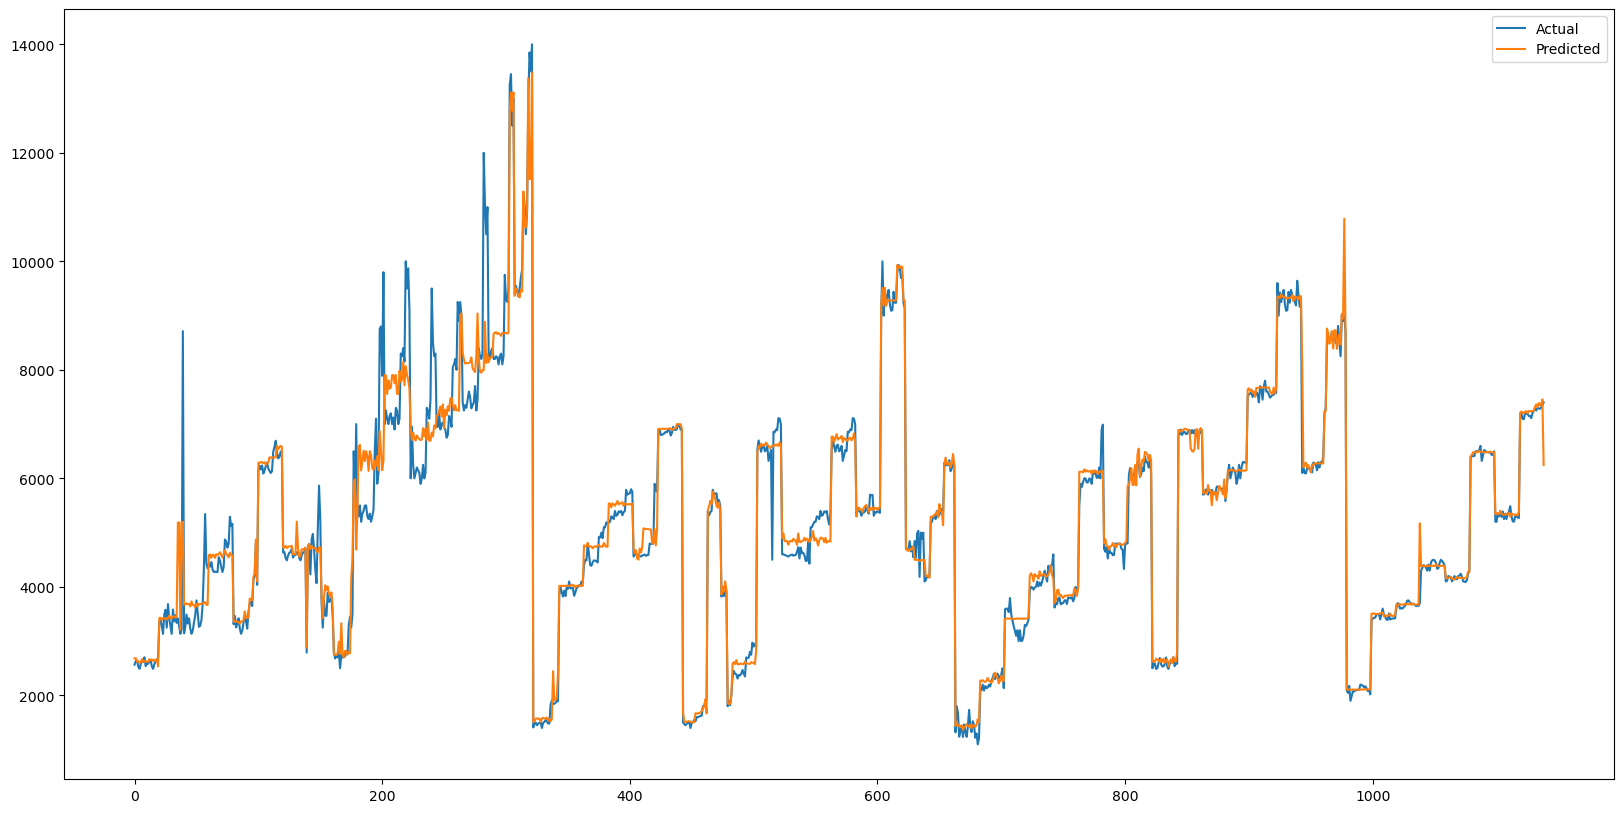

In [165]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=(20,10)
plt.plot(y,label="Actual")
plt.plot(y_pred_final,label="Predicted")
plt.legend()
plt.show()

In [159]:
y_Act=pd.DataFrame(y)

In [160]:
y_Act

,cost
0,2566
1,2633
2,2643
3,2532
4,2489
...,...
1134,7289
1135,7280
1136,7310
1137,7349


In [161]:
y_pred_final=pd.DataFrame(y_pred_final)

In [162]:
y_pred_final

,0
0,2683.181152
1,2684.694336
2,2622.030762
3,2631.301514
4,2602.019531
...,...
1134,7387.060547
1135,7350.206543
1136,7368.623535
1137,7453.594727


In [163]:
Y_Comp=pd.concat([y_Act,y_pred_final],axis=1)

In [164]:
Y_Comp

,cost,0
0,2566,2683.181152
1,2633,2684.694336
2,2643,2622.030762
3,2532,2631.301514
4,2489,2602.019531
...,...,...
1134,7289,7387.060547
1135,7280,7350.206543
1136,7310,7368.623535
1137,7349,7453.594727
